In [1]:
import pandas as pd #manipulasi data
import numpy as np #untuk operasi numerik dan array
import seaborn as sns #untuk visualisasi data yang dibangun
from sklearn.compose import ColumnTransformer #mengubah kolom 'Gender' menjadi format biner (one-hot encoding) dan mempertahankan kolom-kolom lainnya pada saat transformas
from sklearn.model_selection import train_test_split #untuk memisahkan dataset menjadi data latih (training set) dan data uji (testing set)
from sklearn.linear_model import LogisticRegression #untuk membuat dan melatih model regresi logistik.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #menghasilkan laporan klasifikasi, menghitung akurasi dari model klasifikasi, menghitung matriks konfusi
from sklearn.preprocessing import OneHotEncoder #mengubah data kategori menjadi format biner
import matplotlib.pyplot as plt #untuk membuat plot dan visualisasi 2D di Python

In [2]:
from google.colab import drive #digunakan untuk mengakses dan mengelola file yang ada di Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Membaca dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/obesitas.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
#memeriksa apakah terdapat nilai yang hilang (missing values) dalam DataFrame
missing_values = data.isnull().sum()
print("Jumlah Data Kosong dalam Setiap Kolom:")
print(missing_values)

Jumlah Data Kosong dalam Setiap Kolom:
Gender    0
Height    0
Weight    0
Index     0
dtype: int64


In [5]:
# Mendeteksi data duplikat
duplicate_rows = data[data.duplicated()]

# Menghapus data duplikat
data = data.drop_duplicates()

#Pra-Pemrosesan


In [6]:
# Pra-Pemrosesan Data
encoder = OneHotEncoder(sparse=False)
# Kolom 'Gender' dijadikan kategori pada saat transformasi
transformer = ColumnTransformer([('onehot', encoder, ['Gender'])], remainder='passthrough')
X = transformer.fit_transform(data.drop(['Index'], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
#menghitung jumlah kemunculan (count) setiap nilai dalam kolom 'gender'
people = data['Gender'].value_counts()
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    250
Male      239
Name: Gender, dtype: int64

#MEMBANGUN MODEL

In [8]:
#Membagi dataset untuk data training dan data testing
y = data['Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
#Membuat Model dengan menggunakan logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

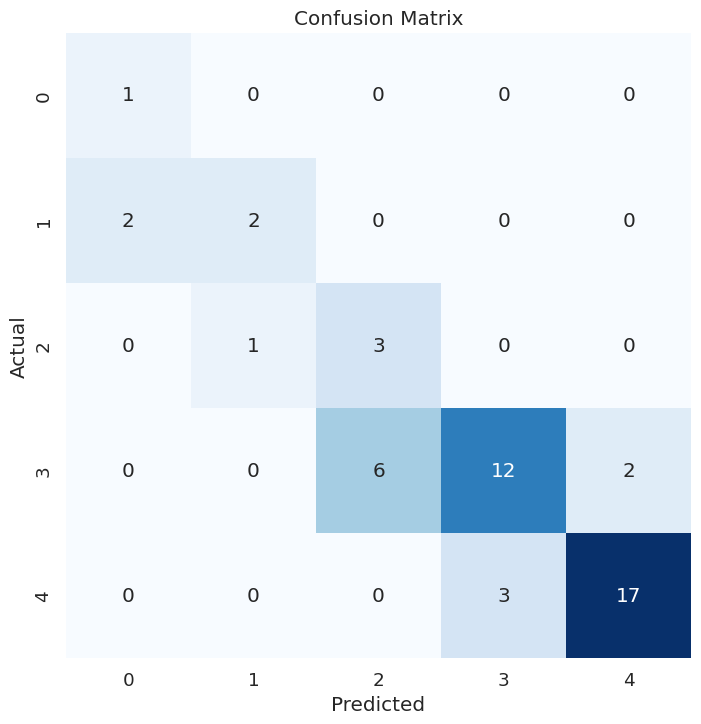

In [10]:
#prediksi dari data uji
y_pred = model.predict(X_test)

#Menghitung confusion matrix
confusion = confusion_matrix(y_test, y_pred)

#Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', cbar=False, square=True)
plt.tight_layout()  #Untuk memastikan label-label tidak terpotong

#Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Menampilkan plot confusion matrix
plt.title('Confusion Matrix')
plt.show()

In [11]:
#Menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

#Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi Model: 0.71
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.67      0.50      0.57         4
           3       0.33      0.75      0.46         4
           4       0.80      0.60      0.69        20
           5       0.89      0.85      0.87        20

    accuracy                           0.71        49
   macro avg       0.61      0.74      0.62        49
weighted avg       0.78      0.71      0.73        49



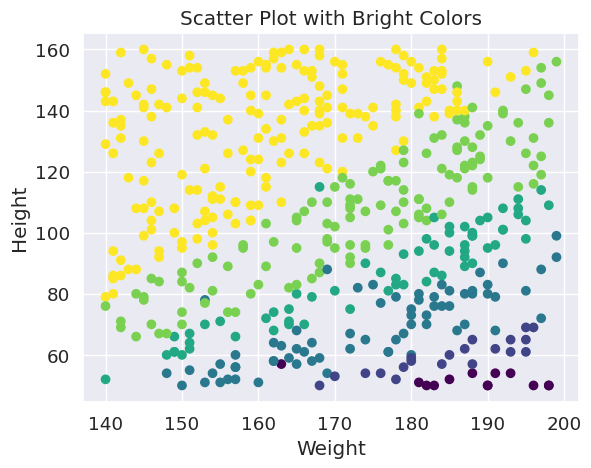

In [12]:
plt.scatter(data['Height'], data['Weight'], c=data['Index'], cmap='viridis')

plt.xlabel('Weight')
plt.ylabel('Height')

plt.title('Scatter Plot with Bright Colors')
plt.show()

In [13]:
#melakukan prediksi
new_data = pd.DataFrame({'Gender': ['Male'], 'Height': [170], 'Weight': [70]})
new_data_encoded = transformer.transform(new_data)
predicted_category = model.predict(new_data_encoded)
print(f'Prediksi Kategori BMI: {predicted_category}')

Prediksi Kategori BMI: [2]
